In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df=pd.read_excel('City Power Consumption.xlsx')
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [6]:
df = df.drop(columns=["S no"])
df.columns = [col.strip().replace(" ", "_") for col in df.columns]

In [7]:
df = df.apply(pd.to_numeric, errors='coerce')

In [8]:
df.isnull().sum()

Temperature                    323
Humidity                        26
Wind_Speed                      71
general_diffuse_flows          308
diffuse_flows                   15
Air_Quality_Index_(PM)          18
Cloudiness                       0
Power_Consumption_in_A_Zone      0
dtype: int64

In [9]:
df = df.fillna(df.median(numeric_only=True))

In [10]:
df.isnull().sum()

Temperature                    0
Humidity                       0
Wind_Speed                     0
general_diffuse_flows          0
diffuse_flows                  0
Air_Quality_Index_(PM)         0
Cloudiness                     0
Power_Consumption_in_A_Zone    0
dtype: int64

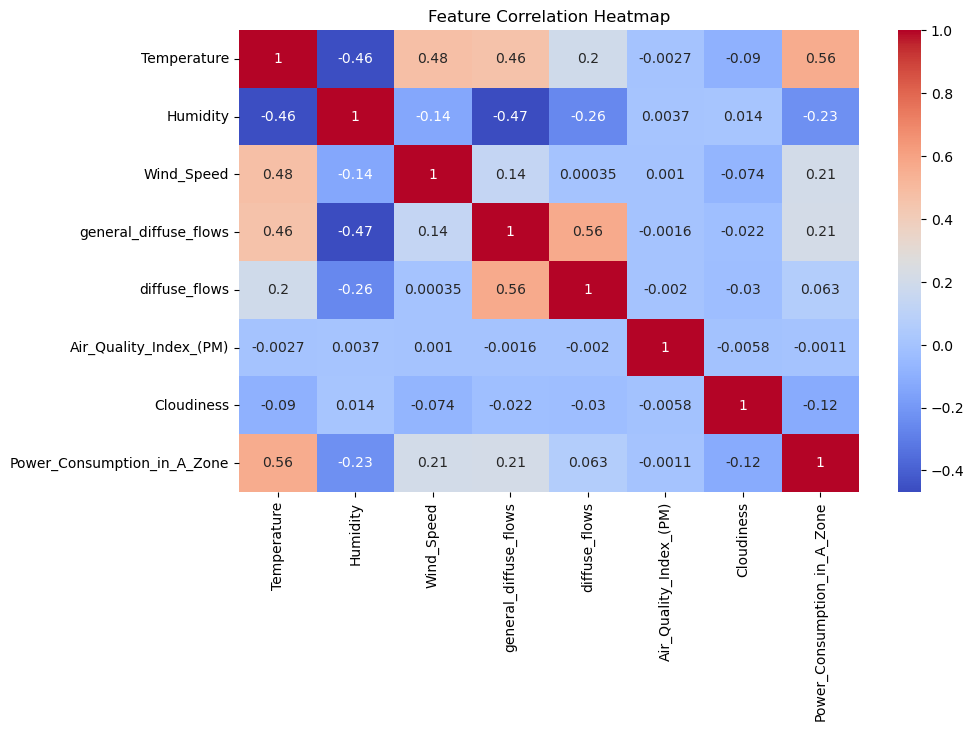

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
X = df.drop(columns=['Power_Consumption_in_A_Zone'])
y = df['Power_Consumption_in_A_Zone']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [25]:
print(mean_absolute_error(y_test,y_pred_lr))
print(mean_squared_error(y_test,y_pred_lr))
print(r2_score(y_test,y_pred_lr))

5295.875546068506
43215108.9211939
0.33103225795684843


In [46]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [47]:
print(mean_absolute_error(y_test,y_pred_rf))
print(mean_squared_error(y_test,y_pred_rf))
print(r2_score(y_test,y_pred_rf))

3384.1385336783483
23386830.324544292
0.6379730268807922


In [29]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [30]:
print(mean_absolute_error(y_test,y_pred_dt))
print(mean_squared_error(y_test,y_pred_dt))
print(r2_score(y_test,y_pred_dt))

4169.129942103261
47508879.74191384
0.264564898681512


In [31]:
gb_model=GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [32]:
print(mean_absolute_error(y_test,y_pred_gb))
print(mean_squared_error(y_test,y_pred_gb))
print(r2_score(y_test,y_pred_gb))

4734.851022487678
36407704.31867236
0.43641054346406405


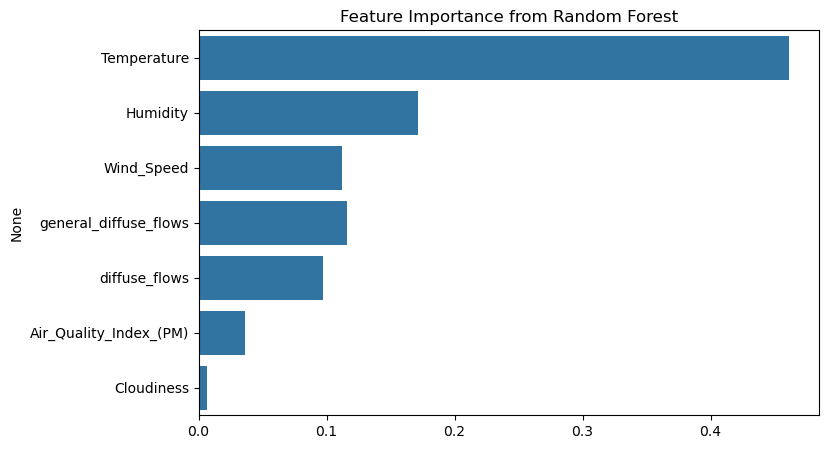

In [48]:
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.show()

In [52]:
final_df=pd.DataFrame({'Models':['LR','RF','DT','GB'],
                       'r2_score':[r2_score(y_test, y_pred_lr),
                                   r2_score(y_test, y_pred_rf),
                                   r2_score(y_test, y_pred_dt),
                                   r2_score(y_test, y_pred_gb)]})

final_df

,Models,r2_score
0,LR,0.331032
1,RF,0.637973
2,DT,0.264565
3,GB,0.436411


<Axes: xlabel='Models', ylabel='r2_score'>

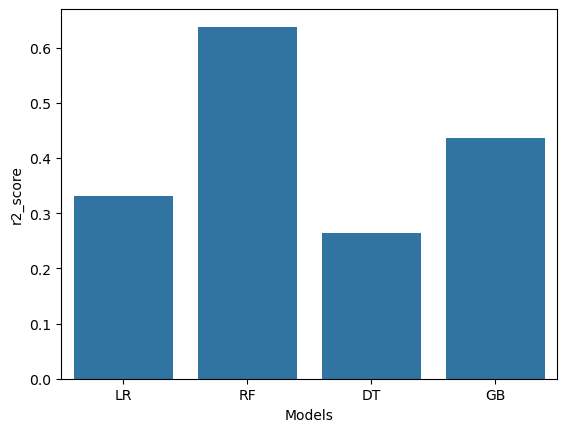

In [53]:
sns.barplot(x='Models', y='r2_score', data=final_df)